In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\a\Desktop\Power Bi Databases\Data Analysis Simplilearn\olympic\athlete_events.csv")
df1 = pd.read_csv(r"C:\Users\a\Desktop\Power Bi Databases\Data Analysis Simplilearn\olympic\noc_regions.csv")

In [4]:
df.shape

(271116, 15)

In [5]:
df1.shape

(230, 3)

In [10]:
df2 = df.merge(df1, how="left", on='NOC')

In [12]:
df2.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [13]:
# rename region & notes column
df2.rename(columns={'region':'Region', 'notes':'Notes'}, inplace=True)

In [15]:
df2.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [21]:
# to print all the column which have null values

col_names = df2.columns[df2.isnull().any()]

f = []
for x in col_names:
    f.append(x)
print(f)

['Age', 'Height', 'Weight', 'Medal', 'Region', 'Notes']


In [23]:
df2.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [30]:
df2.query('Team == "Japan"').head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
625,362,Isao Ko Abe,M,24.0,177.0,75.0,Japan,JPN,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Hammer Throw,NaN,Japan,NaN
629,363,Kazumi Abe,M,28.0,178.0,67.0,Japan,JPN,1976 Winter,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN,Japan,NaN
630,364,Kazuo Abe,M,25.0,166.0,69.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN,Japan,NaN
631,365,Kinya Abe,M,23.0,168.0,68.0,Japan,JPN,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Foil, Individual",NaN,Japan,NaN
632,366,Kiyoshi Abe,M,25.0,167.0,62.0,Japan,JPN,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,Japan,NaN


In [32]:
# Top countries participated
top_10_countries = df2.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

C:\Users\a\AppData\Local\Temp\ipykernel_12932\517834454.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.index, y=top_10_countries, palette='Set2')


<AxesSubplot:title={'center':'Top 10 countries'}, xlabel='None', ylabel='Team'>

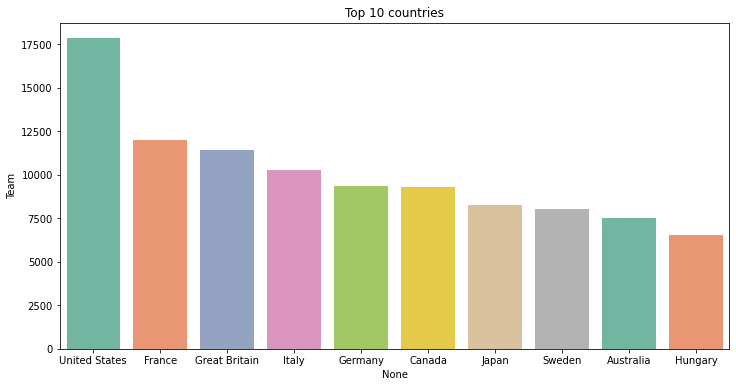

In [37]:
plt.figure(figsize=(12,6))
plt.title("Top 10 countries")
sns.barplot(x=top_10_countries.index, y=top_10_countries, palette='Set2')


(array([1.4000e+01, 2.2600e+02, 3.0400e+03, 9.2280e+03, 1.9795e+04,
        3.4422e+04, 4.2689e+04, 4.1427e+04, 3.3700e+04, 2.5506e+04,
        1.7047e+04, 1.1046e+04, 7.1180e+03, 4.4560e+03, 3.0170e+03,
        2.1630e+03, 1.6590e+03, 1.2670e+03, 8.3700e+02, 7.6900e+02,
        4.7700e+02, 4.4400e+02, 2.6600e+02, 2.0000e+02, 1.7100e+02,
        1.5600e+02, 1.1800e+02, 1.1400e+02, 5.6000e+01, 8.5000e+01,
        6.1000e+01, 3.2000e+01, 1.6000e+01, 9.0000e+00]),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
        44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
        78]),
 <BarContainer object of 34 artists>)

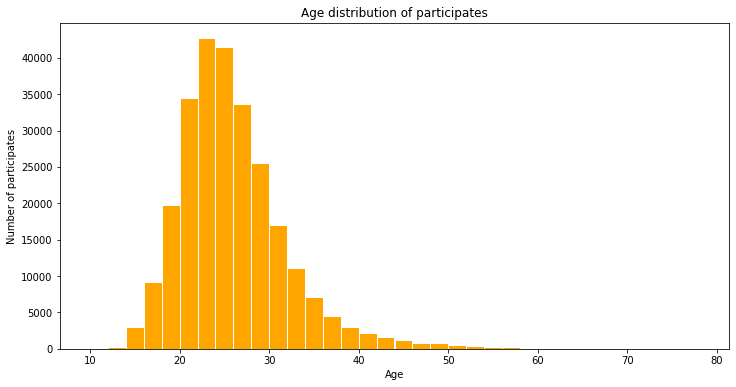

In [45]:
# Age distribution of participates
plt.figure(figsize=(12,6))
plt.title("Age distribution of participates")
plt.xlabel("Age")
plt.ylabel("Number of participates")
plt.hist(df2.Age, bins = np.arange(10,80,2), color='orange', edgecolor='white')

In [48]:
winter_sport = df2[df2.Season == "Winter"].Sport.unique()
winter_sport

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [50]:
df2.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Region', 'Notes'],
      dtype='object')

In [57]:
# male & female participates in sport

gender_count = df2.Sex.value_counts()
gender_count

M    196594
F     74522
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x2a2ad497070>,
 [Text(0.20089640434146097, -1.081499253223354, 'M'),
  Text(-0.2008963030841931, 1.081499272032628, 'F')],
 [Text(0.10957985691352415, -0.5899086835763748, '72.5%'),
  Text(-0.10957980168228713, 0.5899086938359788, '27.5%')])

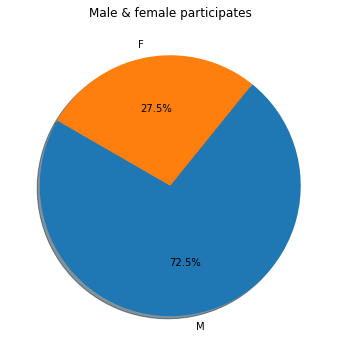

In [59]:
plt.figure(figsize=(12,6))
plt.title("Male & female participates")
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=150, shadow=True)

In [64]:
# Total medals
total_medals = df2['Medal'].value_counts()
total_medals

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [76]:
# Total numbers of womens in each olympics

womenolympic = df2[(df2.Sex == "F") & (df2.Season == "Summer")][['Sex','Year']]
womenolympic = womenolympic.groupby('Year').count().reset_index()
womenolympic.tail()

,Year,Sex
23,2000,5431
24,2004,5546
25,2008,5816
26,2012,5815
27,2016,6223


In [77]:
womenOlympic = df2[(df2.Sex == "F") & (df2.Season == "Summer")]

C:\Users\a\AppData\Local\Temp\ipykernel_12932\1169526283.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=womenOlympic, x="Year", palette="Spectral")


<AxesSubplot:title={'center':'WOmen participlate in Olympics'}, xlabel='Year', ylabel='count'>

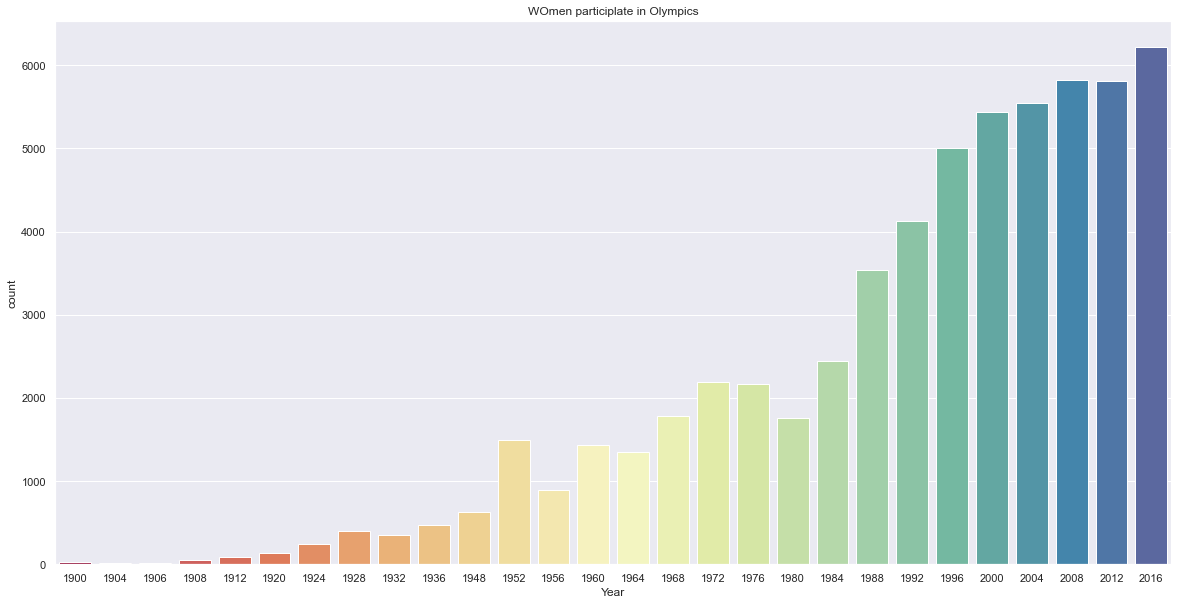

In [88]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
plt.title("WOmen participlate in Olympics")
sns.countplot(data=womenOlympic, x="Year", palette="Spectral")

Text(0.5, 1.0, 'Plot of Female Atheletic')

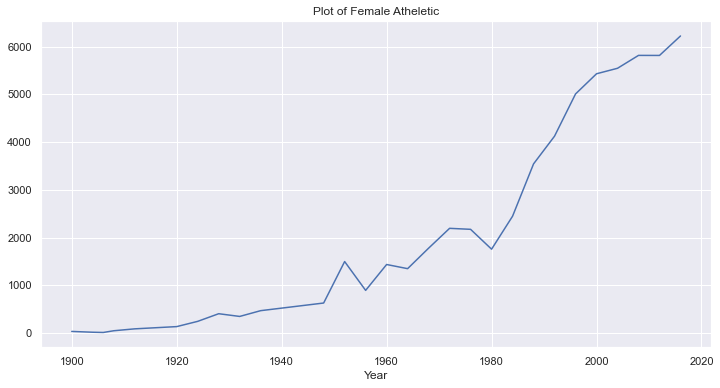

In [90]:
part = womenOlympic.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(12,6))
part.loc[:, 'F'].plot()
plt.title('Plot of Female Atheletic')

In [109]:
# Gold medal atheletics

gold_medal = df2[df2.Medal == "Gold"]
gold_medal.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [111]:
# Take only the values which are different from NAN
gold_medal = gold_medal[np.isfinite(gold_medal['Age'])]

In [113]:
# Gold medal beyond 60

gold_medal['ID'][gold_medal['Age'] > 60].count()

6

In [114]:
sport_event = gold_medal['Sport'][gold_medal['Age'] > 60]
sport_event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

<AxesSubplot:title={'center':'sport event'}, xlabel='count', ylabel='Sport'>

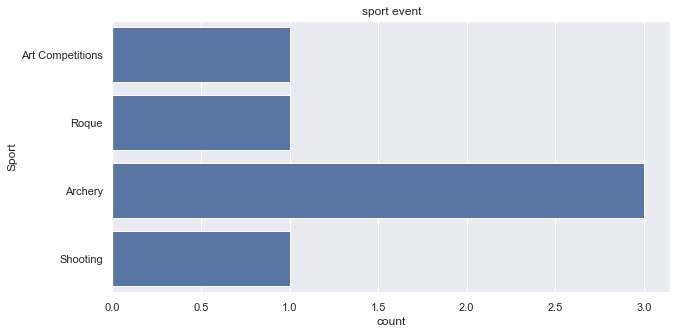

In [118]:
plt.figure(figsize=(10,5))
plt.tight_layout()
plt.title("sport event")
sns.countplot(sport_event)

In [126]:
# GOld medals from each countries

gold_medal.Region.value_counts().reset_index(name='Medal').head(5)


,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567


C:\Users\a\AppData\Local\Temp\ipykernel_12932\833617768.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="index", y="Medal", data=totalGoldMedals, height=5, kind="bar", palette="rocket")


Text(0.5, 1.0, 'Top 5 Gold Medal winner Countries')

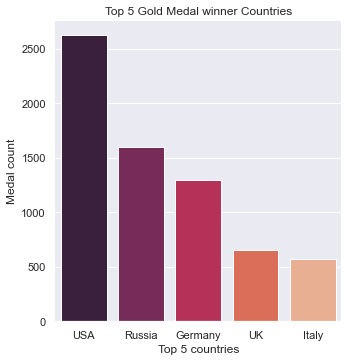

In [129]:
totalGoldMedals = gold_medal.Region.value_counts().reset_index(name="Medal").head(5)
g = sns.catplot(x="index", y="Medal", data=totalGoldMedals, height=5, kind="bar", palette="rocket")
g.despine(left=True)
g.set_xlabels("Top 5 countries")
g.set_ylabels("Medal count")
plt.title("Top 5 Gold Medal winner Countries")


In [132]:
# max year

year = df2.Year.max()
year

team_name = df2[(df2.Year == 2016) & (df2.Medal == "Gold")].Team
team_name.value_counts().head(5)


United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Name: Team, dtype: int64

Text(0.5, 0, 'Countrywise Medal in 2016')

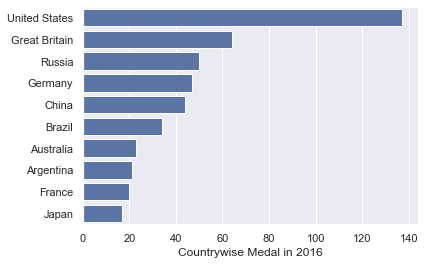

In [137]:
sns.barplot(x = team_name.value_counts().head(10), y=team_name.value_counts().head(10).index)
plt.ylabel(None)
plt.xlabel('Countrywise Medal in 2016')

In [ ]:
)